In [ ]:
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.metrics import confusion_matrix, precision_score, recall_score, hinge_loss, log_loss, classification_report, f1_score
from sklearn.metrics import roc_curve, auc, accuracy_score,  roc_auc_score
from sklearn.linear_model import SGDClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.calibration import CalibratedClassifierCV

In [ ]:
Data = pd.read_csv('/content/drive/MyDrive/ECG/ECG.csv')
Data.columns = Data.columns.str.strip()
print(Data.columns.values)
Data.Status.value_counts()
Data.head()

['avg_R' 'avg_Q' 'avg_S' 'avg_riseTime' 'avg_fallTime' 'avg_riseLevel'
 'avg_fallLevel' 'Ratio1' 'Ratio2' 'Ratio3' 'Bpm' 'Status']


,avg_R,avg_Q,avg_S,avg_riseTime,avg_fallTime,avg_riseLevel,avg_fallLevel,Ratio1,Ratio2,Ratio3,Bpm,Status
0,3.23106,3.043126,0.076940,26.920,23.154,274.19,268.75,3.90294,3.0951,3.10533,74,N
1,3.17053,3.013864,3.057514,18.981,15.278,184.39,113.01,3.99468,3.1046,3.10576,50,A
2,3.41064,3.066886,3.063237,49.293,22.475,477.53,473.88,3.99039,3.1099,3.10556,71,N
3,3.45612,3.044483,3.019901,49.060,27.778,146.07,123.49,3.90176,3.0979,3.10599,105,A
4,3.28479,3.599630,3.055267,36.310,73.611,302.51,343.06,3.91841,3.0822,3.00020,83,N


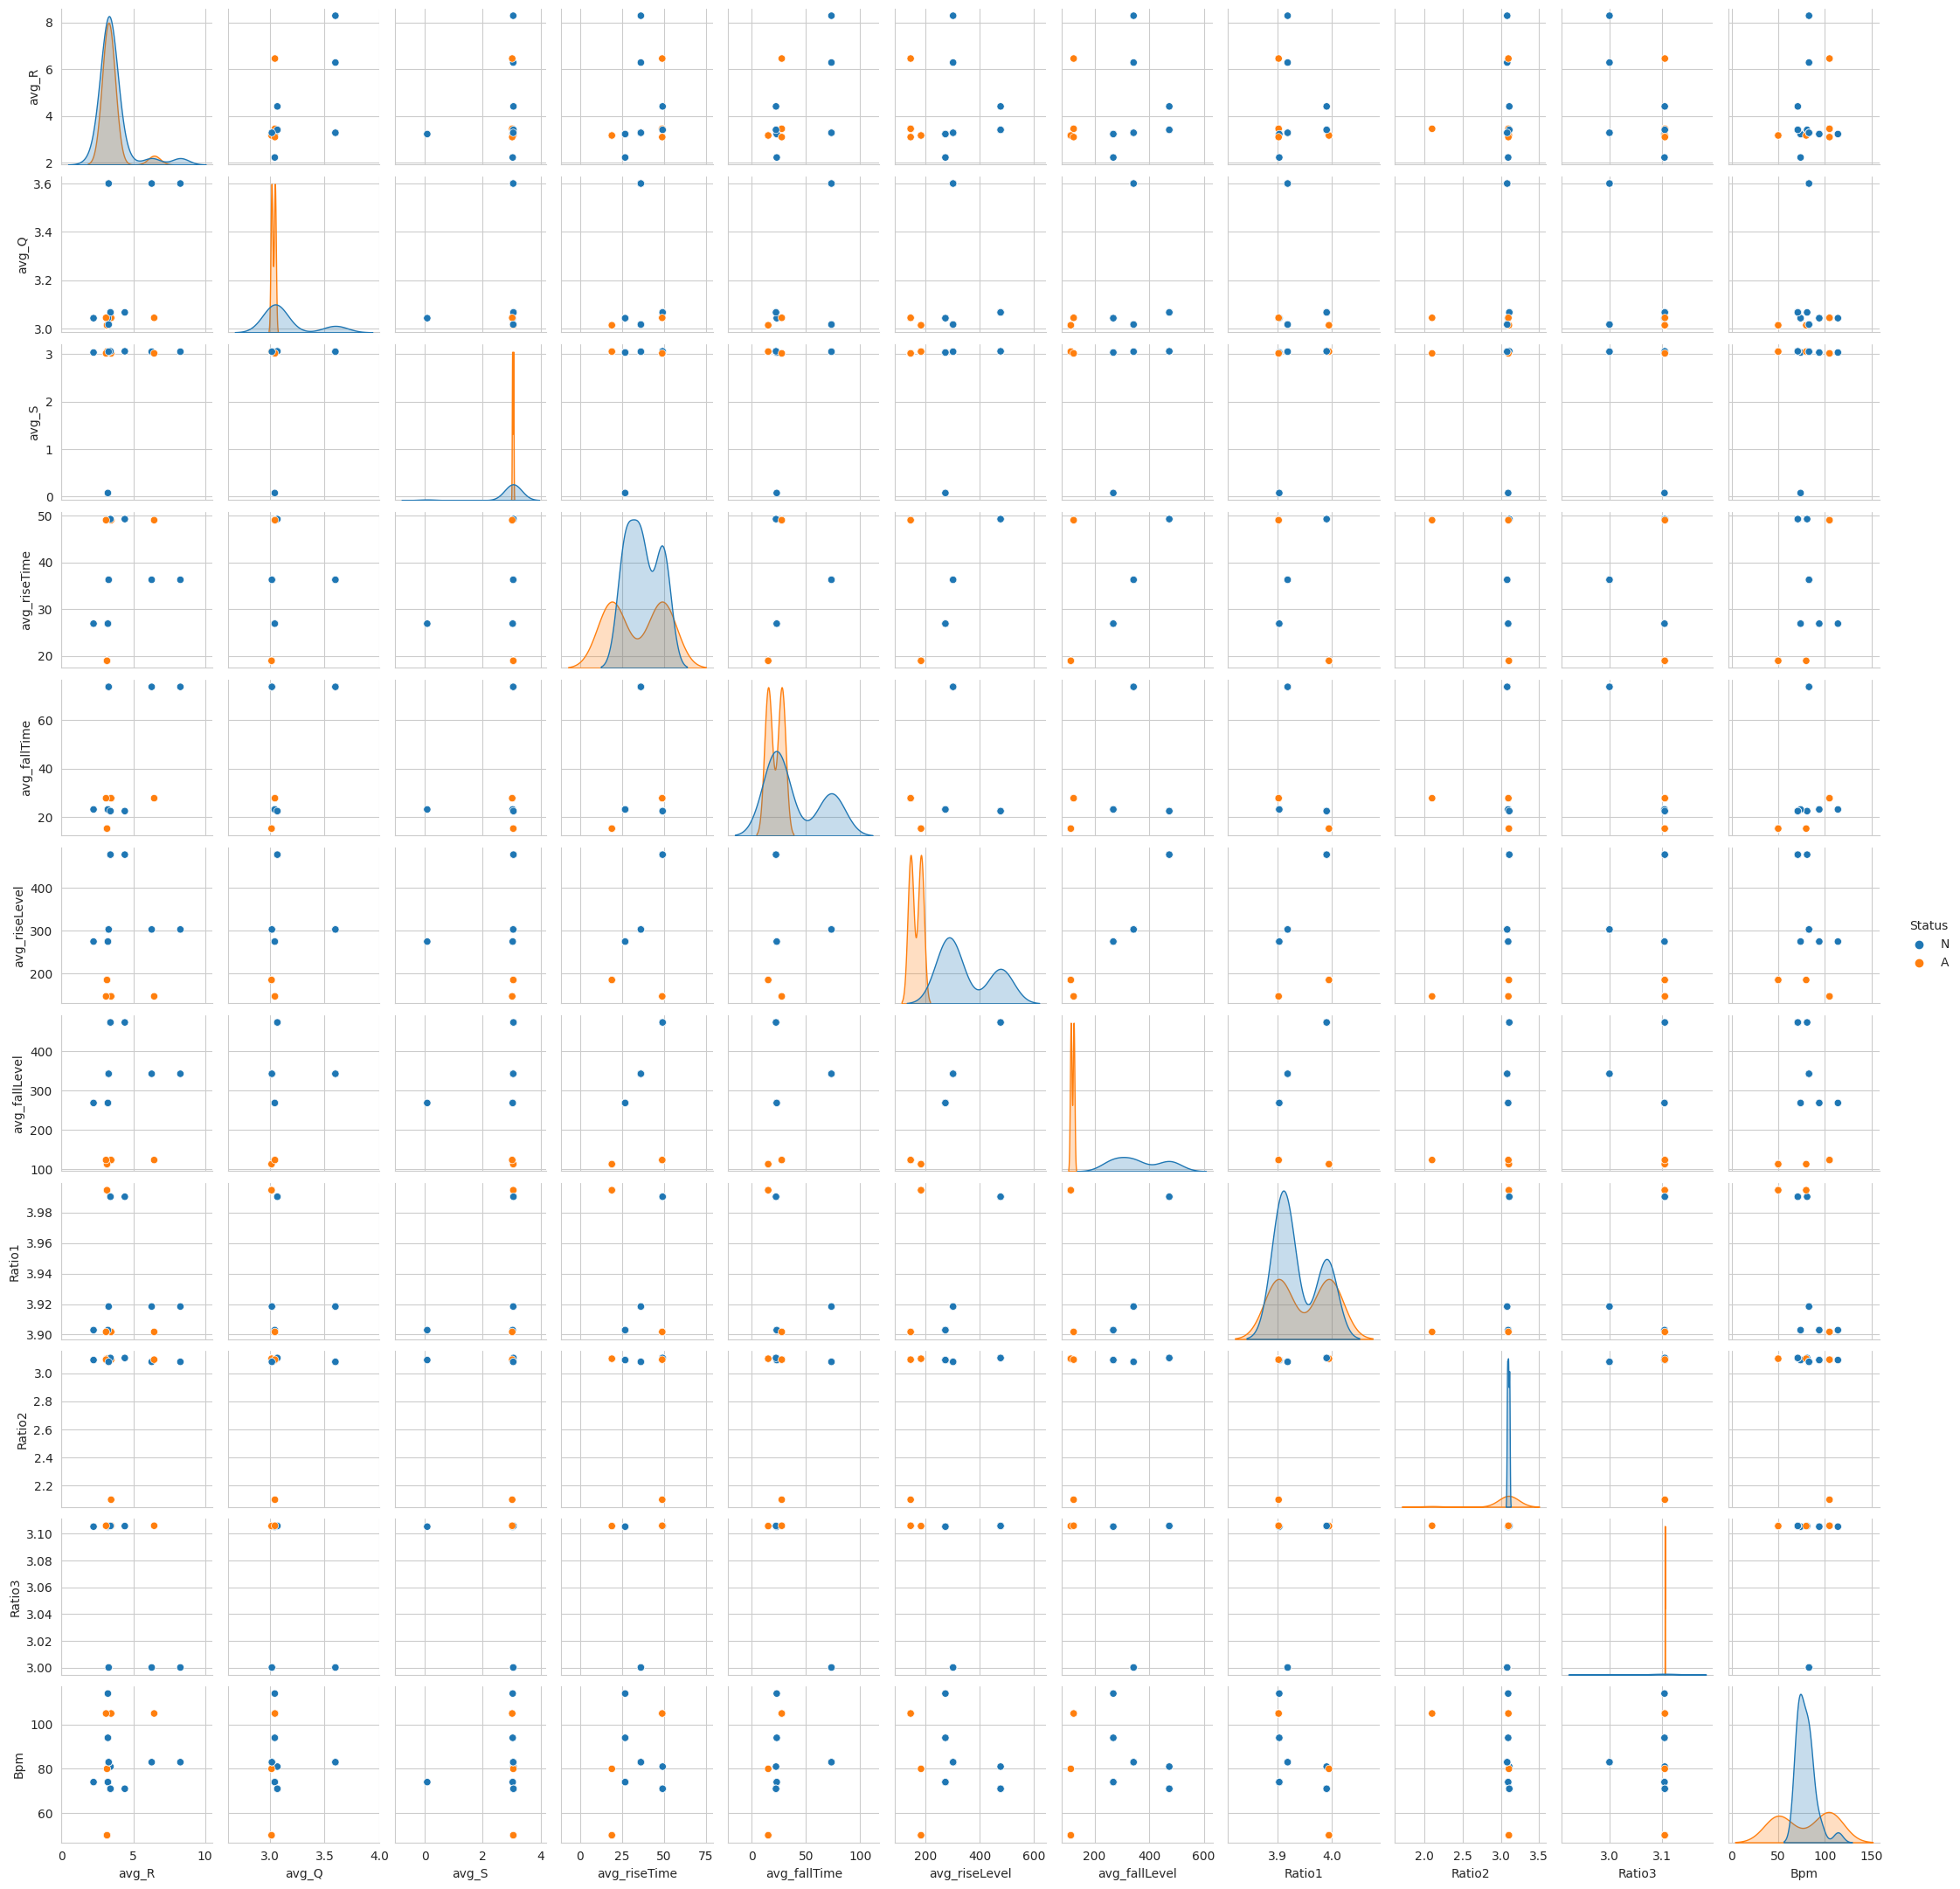

In [ ]:
plt.close();
sns.set_style("whitegrid");
sns.pairplot(Data, hue="Status", size=2);


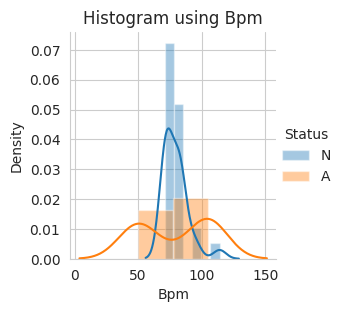

In [ ]:
sns.FacetGrid(Data, hue="Status") \
 .map(sns.distplot, "Bpm") \
 .add_legend();
plt.title("Histogram using Bpm")
plt.show();

N    27
A    18
Name: Status, dtype: int64


<Axes: >

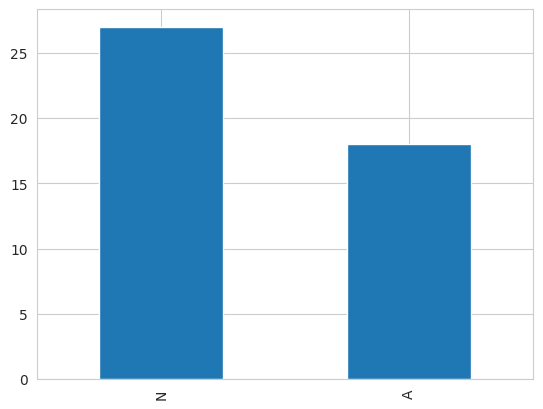

In [ ]:
print(Data['Status'].value_counts())
Data['Status'].value_counts().plot(kind = 'bar')

In [ ]:
Data["Status"].replace({"N": 0, "A": 1}, inplace=True)

In [ ]:
print(Data.head())
X = Data.drop('Status', axis = 1).values
Y = Data['Status'].values


     avg_R     avg_Q     avg_S  avg_riseTime  avg_fallTime  avg_riseLevel  \
0  3.23106  3.043126  0.076940        26.920        23.154         274.19   
1  3.17053  3.013864  3.057514        18.981        15.278         184.39   
2  3.41064  3.066886  3.063237        49.293        22.475         477.53   
3  3.45612  3.044483  3.019901        49.060        27.778         146.07   
4  3.28479  3.599630  3.055267        36.310        73.611         302.51   

   avg_fallLevel   Ratio1  Ratio2   Ratio3  Bpm  Status  
0         268.75  3.90294  3.0951  3.10533   74       0  
1         113.01  3.99468  3.1046  3.10576   50       1  
2         473.88  3.99039  3.1099  3.10556   71       0  
3         123.49  3.90176  3.0979  3.10599  105       1  
4         343.06  3.91841  3.0822  3.00020   83       0  


In [ ]:
X.shape, Y.shape

((45, 11), (45,))

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.21, stratify = Y, random_state = 1)

In [ ]:
X_train.shape, X_test.shape


((35, 11), (10, 11))

In [ ]:
scaler = StandardScaler()
scaler.fit(X_train)

x_train_std = scaler.transform(X_train)
x_test_std = scaler.transform(X_test)

In [ ]:
# This function is used to plot Cofusion Matrix, Precision Matrix and Recall Matrix.
def plot_matrices(Y, Y_Pred):
    C = confusion_matrix(Y, Y_Pred) # Confusion Matrix

    A =(((C.T)/(C.sum(axis=1))).T) # Calculating Recall Matrix

    B =(C/C.sum(axis=0)) # Calculating Precision Matrix
    plt.figure(figsize=(20,4))

    labels = [0,1]
    # representing A in heatmap format
    cmap=sns.light_palette("blue")
    plt.subplot(1, 3, 1)
    sns.heatmap(C, annot=True, cmap=cmap, fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.title("Confusion matrix")

    plt.subplot(1, 3, 2)
    sns.heatmap(B, annot=True, cmap=cmap, fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.title("Precision matrix")
    print("Sum of columns in precision matrix",B.sum(axis=0))

    plt.subplot(1, 3, 3)
    # representing B in heatmap format
    sns.heatmap(A, annot=True, cmap=cmap, fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.title("Recall matrix")
    print("Sum of rows in recall matrix",A.sum(axis=1))

    plt.show()

In [ ]:
def Metrics(model, X, Y):
    y_pred_prob = model.predict_proba(X)[:, 1]
    y_pred = model.predict(X)

    print("The Prescision Score: ", precision_score(Y, y_pred))
    print("The Recall Score: ", recall_score(Y, y_pred))
    print("The ROC Score: ", roc_auc_score(Y, y_pred_prob))
    print("The F1 Score: ", f1_score(Y, y_pred))
    print("The Log loss: ", log_loss(Y, y_pred_prob))
    print('*'*100)
    print(classification_report(Y, y_pred))
    print('*'*100)
    plot_matrices(Y, y_pred)

In [ ]:
balance = [{0: 1.9, 1: 3}, {0:3, 1:1.9}]

KNN

In [ ]:
neigh = KNeighborsClassifier()
parameters = {'n_neighbors': [3, 5, 7, 9, 12, 15, 17, 20, 25, 27],
             'weights' : ['uniform', 'distance']}
clf = GridSearchCV(neigh, parameters, cv=5, scoring='roc_auc', return_train_score=True, n_jobs = -1)
clf.fit(x_train_std, y_train)


GridSearchCV(cv=5, estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'n_neighbors': [3, 5, 7, 9, 12, 15, 17, 20, 25, 27],
                         'weights': ['uniform', 'distance']},
             return_train_score=True, scoring='roc_auc')

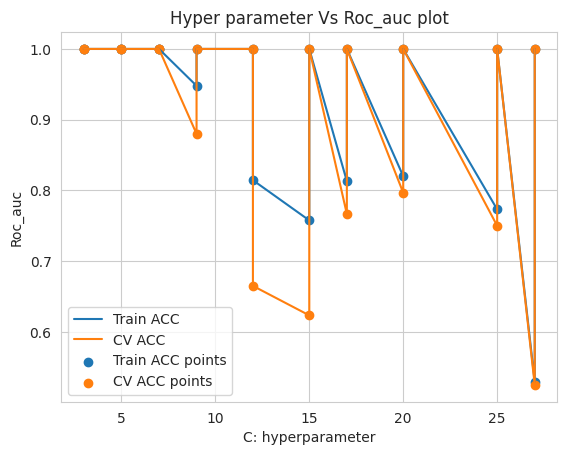

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_neighbors,param_weights,params,split0_test_score,split1_test_score,split2_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.001819,0.001168,0.003582,0.000671,3,uniform,"{'n_neighbors': 3, 'weights': 'uniform'}",1.0,1.0,1.0,...,1.0,0.0,1,1.0,1.0,1.0,1.0,1.0,1.0,0.0
1,0.002680,0.003159,0.006291,0.001751,3,distance,"{'n_neighbors': 3, 'weights': 'distance'}",1.0,1.0,1.0,...,1.0,0.0,1,1.0,1.0,1.0,1.0,1.0,1.0,0.0
2,0.000911,0.000048,0.004538,0.002405,5,uniform,"{'n_neighbors': 5, 'weights': 'uniform'}",1.0,1.0,1.0,...,1.0,0.0,1,1.0,1.0,1.0,1.0,1.0,1.0,0.0
3,0.001045,0.000172,0.004525,0.003314,5,distance,"{'n_neighbors': 5, 'weights': 'distance'}",1.0,1.0,1.0,...,1.0,0.0,1,1.0,1.0,1.0,1.0,1.0,1.0,0.0
4,0.000954,0.000055,0.002683,0.000051,7,uniform,"{'n_neighbors': 7, 'weights': 'uniform'}",1.0,1.0,1.0,...,1.0,0.0,1,1.0,1.0,1.0,1.0,1.0,1.0,0.0


In [ ]:
results = pd.DataFrame.from_dict(clf.cv_results_)
results = results.sort_values(['param_n_neighbors'])

train_acc= results['mean_train_score']
train_acc_std= results['std_train_score']
cv_acc = results['mean_test_score']
cv_acc_std= results['std_test_score']
K = results['param_n_neighbors']

plt.plot(K, train_acc, label='Train ACC')
# plt.gca().fill_between(K, train_auc - train_auc_std,train_auc + train_auc_std,alpha=0.2,color='darkblue')

plt.plot(K, cv_acc, label='CV ACC')
# plt.gca().fill_between(K, cv_auc - cv_auc_std,cv_auc + cv_auc_std,alpha=0.2,color='darkorange')

plt.scatter(K, train_acc, label='Train ACC points')
plt.scatter(K, cv_acc, label='CV ACC points')


plt.legend()
plt.xlabel("C: hyperparameter")
plt.ylabel("Roc_auc")
plt.title("Hyper parameter Vs Roc_auc plot")
plt.grid(True)
plt.show()

results.head()

In [ ]:
clf.best_params_, clf.best_score_

({'n_neighbors': 3, 'weights': 'uniform'}, 1.0)

In [ ]:
# Using the best model
neigh = KNeighborsClassifier(n_neighbors = 7, weights = 'uniform')

In [ ]:
neigh.fit(x_train_std, y_train)
sig_clf = CalibratedClassifierCV(neigh, method="isotonic")
sig_clf.fit(x_train_std, y_train)

CalibratedClassifierCV(estimator=KNeighborsClassifier(n_neighbors=7),
                       method='isotonic')

In [ ]:
y_train_pred = sig_clf.predict_proba(x_train_std)[:, 1]
y_test_pred = sig_clf.predict_proba(x_test_std)[:, 1]

train_fpr, train_tpr, tr_thresholds = roc_curve(y_train, y_train_pred)
test_fpr, test_tpr, test_thresholds = roc_curve(y_test, y_test_pred)

The Prescision Score:  1.0
The Recall Score:  1.0
The ROC Score:  1.0
The F1 Score:  1.0
The Log loss:  2.2204460492503136e-16
****************************************************************************************************
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        21
           1       1.00      1.00      1.00        14

    accuracy                           1.00        35
   macro avg       1.00      1.00      1.00        35
weighted avg       1.00      1.00      1.00        35

****************************************************************************************************
Sum of columns in precision matrix [1. 1.]
Sum of rows in recall matrix [1. 1.]


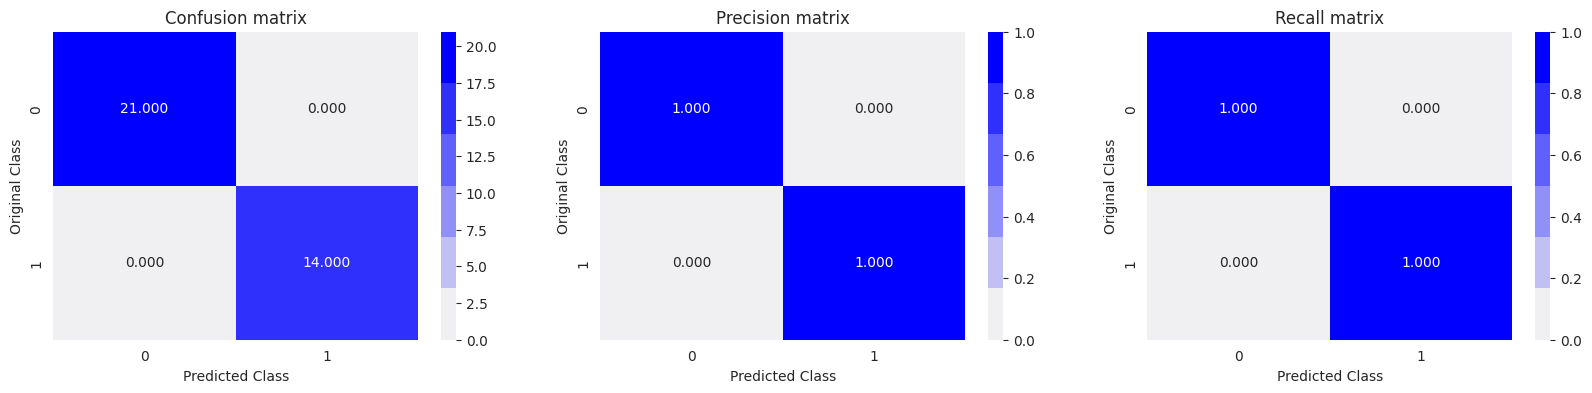

The Prescision Score:  1.0
The Recall Score:  0.75
The ROC Score:  0.875
The F1 Score:  0.8571428571428571
The Log loss:  3.604365338911715
****************************************************************************************************
              precision    recall  f1-score   support

           0       0.86      1.00      0.92         6
           1       1.00      0.75      0.86         4

    accuracy                           0.90        10
   macro avg       0.93      0.88      0.89        10
weighted avg       0.91      0.90      0.90        10

****************************************************************************************************
Sum of columns in precision matrix [1. 1.]
Sum of rows in recall matrix [1. 1.]


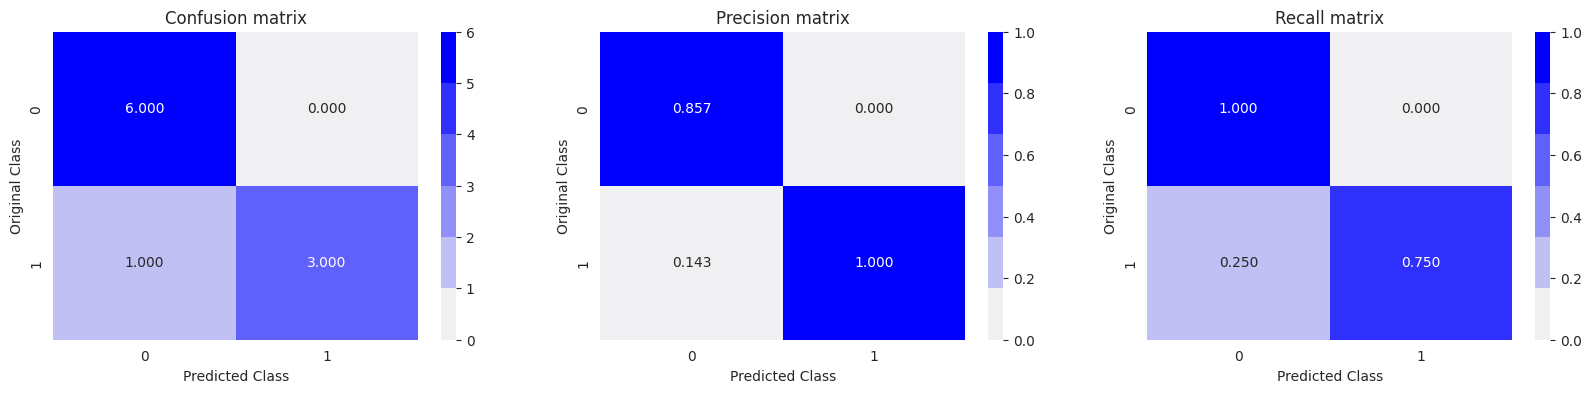

In [ ]:
Metrics(sig_clf, x_train_std, y_train) # Train dataset
print('='*100)
print('='*100)
Metrics(sig_clf, x_test_std, y_test) # Test dataset

In [ ]:
def Metrics(model, X, Y, threshold):
    y_pred_prob = model.predict_proba(X)[:, 1]
    y_pred = model.predict(X)

    print("The Prescision Score: ", precision_score(Y, predict_with_best_t(y_pred_prob, threshold)))
    print("The Recall Score: ", recall_score(Y, predict_with_best_t(y_pred_prob, threshold)))
    print("The ROC Score: ", roc_auc_score(Y, y_pred_prob))
    print("The F1 Score: ", f1_score(Y, predict_with_best_t(y_pred_prob, threshold)))
    print("The Log loss: ", log_loss(Y, y_pred_prob))
    print('*'*100)
    print(classification_report(Y, predict_with_best_t(y_pred_prob, threshold)))
    print('*'*100)
    plot_matrices(Y, predict_with_best_t(y_pred_prob, threshold))

In [ ]:
def find_best_threshold(threshould, fpr, tpr):
    # This function finds the optimal threshold value based on G-Mean metric
    t = threshould[np.argmax(tpr*(1-fpr))]
    # (tpr*(1-fpr)) will be maximum if your fpr is very low and tpr is very high
    print("the maximum value of (tpr*(1-fpr))", max(tpr*(1-fpr)), "for threshold", np.round(t,3))
    return t

def predict_with_best_t(proba, threshould): # This function predicts class labels based on the optimal threshold value.
    predictions = []
    for i in proba:
        if i>=threshould:
            predictions.append(1)
        else:
            predictions.append(0)
    return predictions

KERNAL SVC


In [ ]:
svc = SVC(decision_function_shape = 'ovo', probability = True)
parameters = {'C' : [1e-4, 1e-3, 1e-2, 1e-1, 1, 10, 100, 1000],
             'gamma': [1, 10, 100, 1000],
              'degree': [2, 3, 4, 5, 6],
              'kernel' : ['rbf', 'poly', 'sigmoid'],
              'class_weight' : balance
             }
clf = RandomizedSearchCV(svc, parameters, cv=5, scoring='roc_auc', return_train_score=True, n_jobs = -1)
clf.fit(x_train_std, y_train)

RandomizedSearchCV(cv=5,
                   estimator=SVC(decision_function_shape='ovo',
                                 probability=True),
                   n_jobs=-1,
                   param_distributions={'C': [0.0001, 0.001, 0.01, 0.1, 1, 10,
                                              100, 1000],
                                        'class_weight': [{0: 1.9, 1: 3},
                                                         {0: 3, 1: 1.9}],
                                        'degree': [2, 3, 4, 5, 6],
                                        'gamma': [1, 10, 100, 1000],
                                        'kernel': ['rbf', 'poly', 'sigmoid']},
                   return_train_score=True, scoring='roc_auc')

In [ ]:
clf.best_estimator_

SVC(C=0.1, class_weight={0: 3, 1: 1.9}, decision_function_shape='ovo', gamma=10,
    probability=True)

In [ ]:
clf.best_params_, clf.best_score_

({'kernel': 'rbf',
  'gamma': 10,
  'degree': 3,
  'class_weight': {0: 3, 1: 1.9},
  'C': 0.1},
 1.0)

In [ ]:
svc = clf.best_estimator_
svc

SVC(C=0.1, class_weight={0: 3, 1: 1.9}, decision_function_shape='ovo', gamma=10,
    probability=True)

In [ ]:
# Calibrating the probability scores using Calibrated Classifier
svc.fit(x_train_std, y_train)
sig_clf = CalibratedClassifierCV(svc, method="isotonic")
sig_clf.fit(x_train_std, y_train)

CalibratedClassifierCV(estimator=SVC(C=0.1, class_weight={0: 3, 1: 1.9},
                                     decision_function_shape='ovo', gamma=10,
                                     probability=True),
                       method='isotonic')

In [ ]:
y_train_pred = sig_clf.predict_proba(x_train_std)[:, 1]
y_test_pred = sig_clf.predict_proba(x_test_std)[:, 1]

In [ ]:
# Threshold Tuning based on the Test Dataset.
train_fpr, train_tpr, tr_thresholds = roc_curve(y_train, y_train_pred)
test_fpr, test_tpr, test_thresholds = roc_curve(y_test, y_test_pred)
best_t = find_best_threshold(test_thresholds, test_fpr, test_tpr)

the maximum value of (tpr*(1-fpr)) 0.8333333333333334 for threshold 0.301


The Prescision Score:  1.0
The Recall Score:  1.0
The ROC Score:  1.0
The F1 Score:  1.0
The Log loss:  0.02350275725180119
****************************************************************************************************
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        21
           1       1.00      1.00      1.00        14

    accuracy                           1.00        35
   macro avg       1.00      1.00      1.00        35
weighted avg       1.00      1.00      1.00        35

****************************************************************************************************
Sum of columns in precision matrix [1. 1.]
Sum of rows in recall matrix [1. 1.]


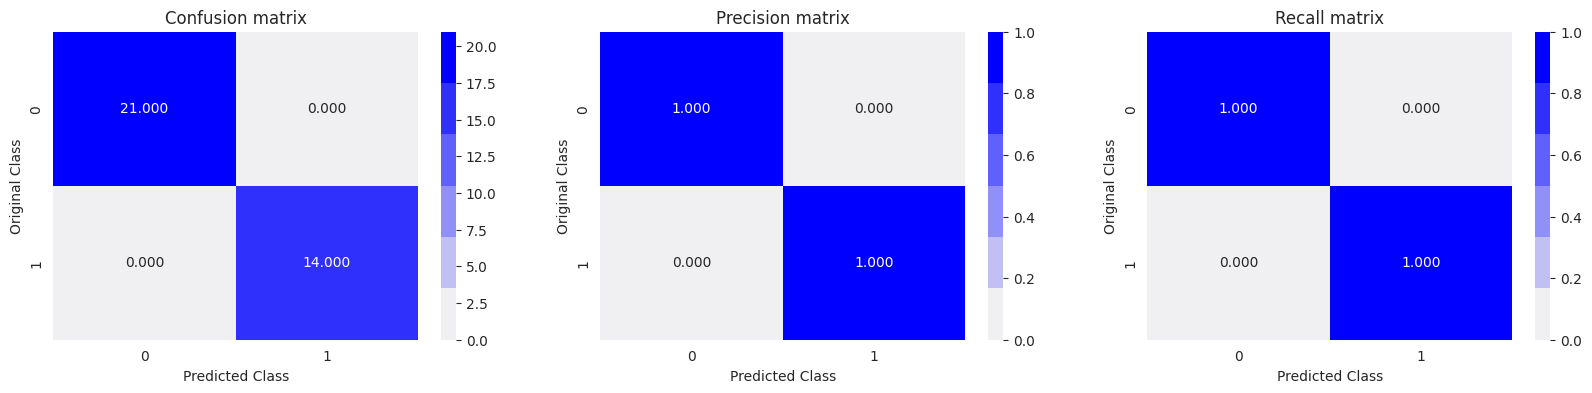

The Prescision Score:  0.8
The Recall Score:  1.0
The ROC Score:  0.9791666666666667
The F1 Score:  0.888888888888889
The Log loss:  0.16655541848593408
****************************************************************************************************
              precision    recall  f1-score   support

           0       1.00      0.83      0.91         6
           1       0.80      1.00      0.89         4

    accuracy                           0.90        10
   macro avg       0.90      0.92      0.90        10
weighted avg       0.92      0.90      0.90        10

****************************************************************************************************
Sum of columns in precision matrix [1. 1.]
Sum of rows in recall matrix [1. 1.]


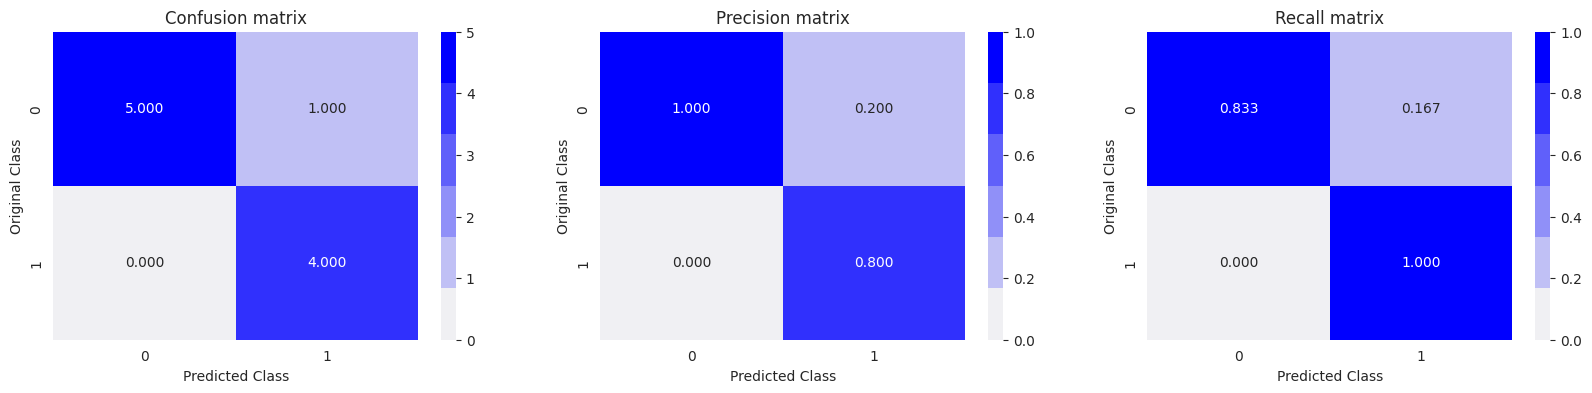

In [ ]:
Metrics(sig_clf, x_train_std, y_train, best_t) # Train dataset
print('='*100)
print('='*100)
Metrics(sig_clf, x_test_std, y_test, best_t) # Test dataset

LOGISTIC REGRESSION

In [ ]:
param = {'alpha' : [1e-4, 1e-3, 1e-2, 1e-1, 1, 1e1, 1e2, 1e3, 1e4, 1e5],
         'penalty' : ['l1', 'l2', 'elasticnet'],
         'l1_ratio' : list(np.sort(np.random.uniform(0, 1, 10))),
         'class_weight' : balance}
LR = SGDClassifier(loss='log', n_jobs = -1)
clf = RandomizedSearchCV(LR, param, cv=5, scoring='roc_auc', return_train_score=True, n_jobs = -1)
clf.fit(x_train_std, y_train)

RandomizedSearchCV(cv=5, estimator=SGDClassifier(loss='log', n_jobs=-1),
                   n_jobs=-1,
                   param_distributions={'alpha': [0.0001, 0.001, 0.01, 0.1, 1,
                                                  10.0, 100.0, 1000.0, 10000.0,
                                                  100000.0],
                                        'class_weight': [{0: 1.9, 1: 3},
                                                         {0: 3, 1: 1.9}],
                                        'l1_ratio': [0.0015576527338524437,
                                                     0.036729461045174716,
                                                     0.3811829211203761,
                                                     0.5654696492630548,
                                                     0.5844569905179282,
                                                     0.7672406795395901,
                                                     0.8035974295251418,
                                                     0.949807628111337,
                                                     0.9598997634181566,
                                                     0.968479055439728],
                                        'penalty': ['l1', 'l2', 'elasticnet']},
                   return_train_score=True, scoring='roc_auc')

In [ ]:
clf.best_params_, clf.best_score_

({'penalty': 'l1',
  'l1_ratio': 0.8035974295251418,
  'class_weight': {0: 1.9, 1: 3},
  'alpha': 0.001},
 1.0)

In [ ]:
LR = clf.best_estimator_
LR

SGDClassifier(alpha=0.001, class_weight={0: 1.9, 1: 3},
              l1_ratio=0.8035974295251418, loss='log', n_jobs=-1, penalty='l1')

In [ ]:
LR.fit(x_train_std, y_train)
sig_clf = CalibratedClassifierCV(LR, method="isotonic")
sig_clf.fit(x_train_std, y_train)

CalibratedClassifierCV(estimator=SGDClassifier(alpha=0.001,
                                               class_weight={0: 1.9, 1: 3},
                                               l1_ratio=0.8035974295251418,
                                               loss='log', n_jobs=-1,
                                               penalty='l1'),
                       method='isotonic')

In [ ]:
y_train_pred = sig_clf.predict_proba(x_train_std)[:, 1]
y_test_pred = sig_clf.predict_proba(x_test_std)[:, 1]

The Prescision Score:  1.0
The Recall Score:  1.0
The ROC Score:  1.0
The F1 Score:  1.0
The Log loss:  0.043046473683562375
****************************************************************************************************
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        21
           1       1.00      1.00      1.00        14

    accuracy                           1.00        35
   macro avg       1.00      1.00      1.00        35
weighted avg       1.00      1.00      1.00        35

****************************************************************************************************
Sum of columns in precision matrix [1. 1.]
Sum of rows in recall matrix [1. 1.]


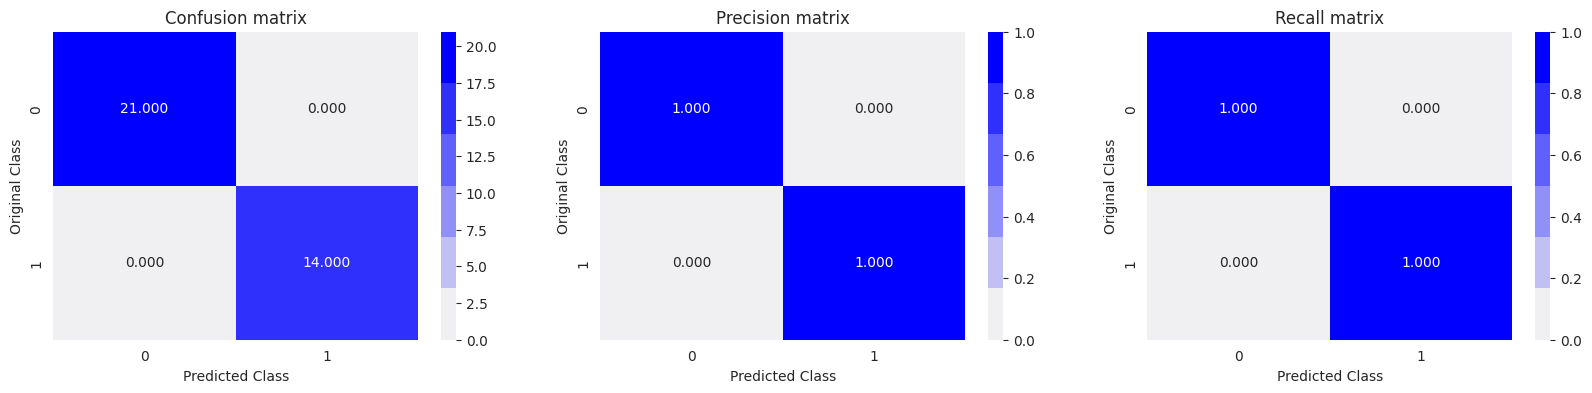

The Prescision Score:  1.0
The Recall Score:  0.75
The ROC Score:  0.8125
The F1 Score:  0.8571428571428571
The Log loss:  3.6316612672221495
****************************************************************************************************
              precision    recall  f1-score   support

           0       0.86      1.00      0.92         6
           1       1.00      0.75      0.86         4

    accuracy                           0.90        10
   macro avg       0.93      0.88      0.89        10
weighted avg       0.91      0.90      0.90        10

****************************************************************************************************
Sum of columns in precision matrix [1. 1.]
Sum of rows in recall matrix [1. 1.]


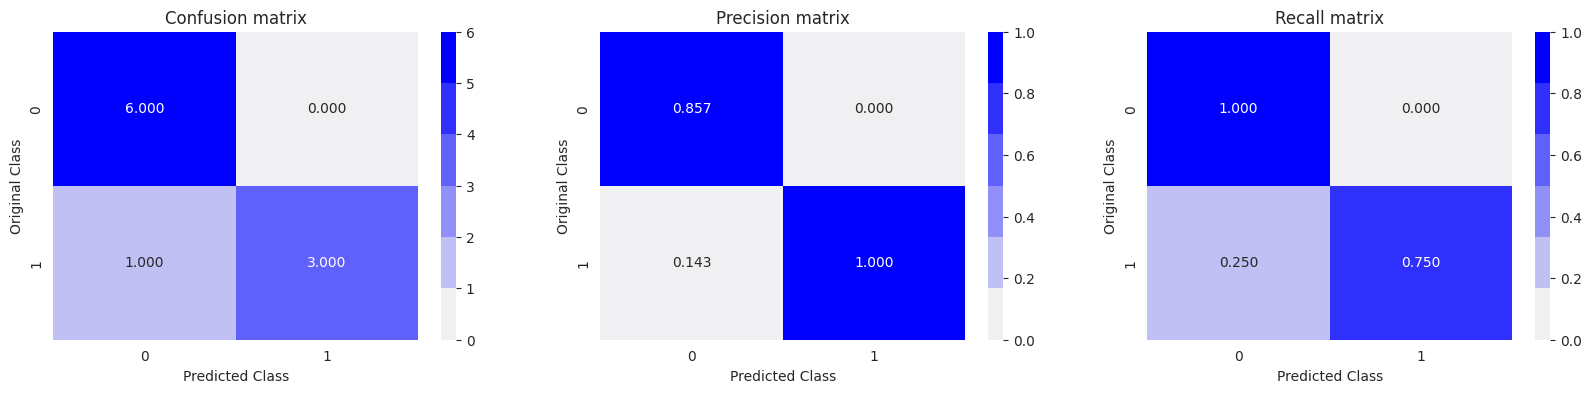

In [ ]:
Metrics(sig_clf, x_train_std, y_train, best_t) # Train dataset
print('='*100)
print('='*100)
Metrics(sig_clf, x_test_std, y_test, best_t) # Test dataset